# <span style="color:darkblue"> Lecture 22 - Practicing Time and Plots  </span>

<font size = "5">

In  this lecture we will practice working with time in Python

- There will be a quiz on this lecture


# <span style="color:darkblue"> I. Review of time commands </span>

<font size = "5">

Line plot: $\qquad \qquad \qquad \quad \ $ ``` plt.plot() ```

Parse string column to date: $\ $``` pd.to_datetime(data_column,format)```

Date to string:  $\qquad \qquad \quad \ $ ```.dt.strftime(format)```

Group by time period:
$\qquad \ \ $ ``` pd.Grouper(key='date', freq='m')```

Include group as column: $\quad$ ```.reset_index()```

Difference between periods: $\ $``` .diff() ```

Lag a periods: $\qquad \qquad \quad \ $ ``` .shift(1) ```

Between two periods (bool): $\ $ ```.between("date1","date2")```

Convert wide to long: $\qquad \quad $ ``` pd.melt(...) ```

Convert long to wide: $\qquad \quad $ ``` pd.pivot(...) ```

## <span style="color:darkblue"> II. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)

The quiz will use a time series dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime
financial = pd.read_csv("data_raw/financial.csv")


<font size = "5">

(a) Import a dataset, parse date column using wildcards <br>
$\quad$ (see Lecture 20), and sort dataset

(b) Line plots from multiple columns with a legend

(c) Compute growth rates for a time series

(d) Flag a subset of the data and produce a shaded plot <br>
$\quad$ as in Lecture 21

(e) Compute aggregate dataset by time period

(f) Convert a dataset to long format


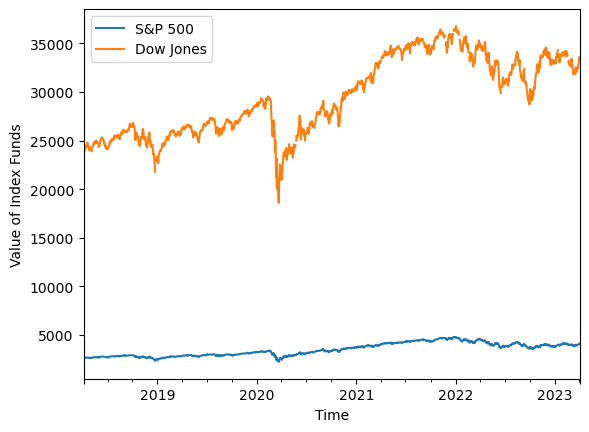

In [15]:
#A
financial["date"] = pd.to_datetime(financial["date_str"])
financial = financial.sort_values("date",ascending = True)

date1 = pd.to_datetime(financial["date_ex1"], format = "%B %d %Y")
date2 = pd.to_datetime(financial["date_ex2"], format = "%A, %Y-%m-%d")

#B

financial[["date","sp500","djia"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])




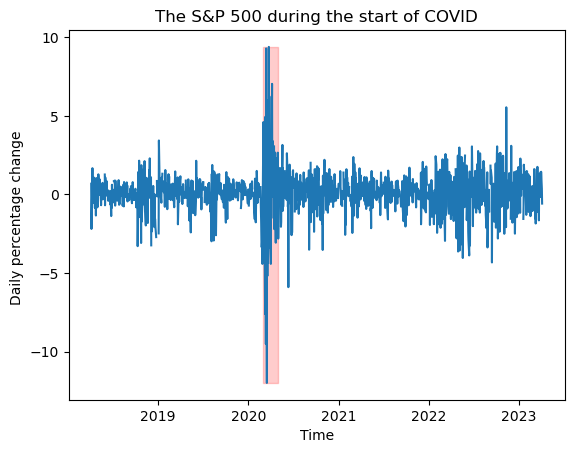

In [14]:
#C
financial["diff_sp500"] = financial["sp500"].diff()
financial["lag_sp500"]    = financial["sp500"].shift(1)
financial["growth_sp500"] = (financial["diff_sp500"]/financial["lag_sp500"])* 100

#D
# Create a line plot

financial["bool_period"]  = financial["date"].between("2020-03-01","2020-05-01")
financial["bool_example"] = financial["growth_sp500"] > 5
plt.plot("date", "growth_sp500", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("The S&P 500 during the start of COVID")

# Add a shaded region wth a rectangle
# "x" is the x-coordinates, "y1" and "y2" are the lower
# and upper bounds of the rectangle. We can set this
# to be the minimum and meximum of the outcome.
# we use "where" to test a logical condition

vec_y = financial["growth_sp500"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_period"],
                 alpha = 0.2,color = "red")

plt.show()

In [16]:
#e
#f
financial_long = pd.melt(financial,
                         var_name   = "portfolio_type",
                         value_name = "portfolio_value",
                         id_vars='date',
                         value_vars=['sp500','djia'])